In [68]:
using QuadGK
using Plots
using LaTeXStrings
using Smoothers
using DelimitedFiles
using Dierckx

In [69]:
# Specify the path to your .txt file
file_path = "LP_r_0_p_85_B_0_Num_1.txt"

# Read the data, skipping the header lines
data, header = readdlm(file_path, '\t', header=true, skipstart=21);

In [70]:
println(size(data))  # Check the dimensions of the data
println(data)  

(730, 4)
Any["" -49.990292 -4.449356e-5 ""; "" -49.891689 -4.446824e-5 ""; "" -49.791836 -4.455934e-5 ""; "" -49.690174 -4.440246e-5 ""; "" -49.591206 -4.442746e-5 ""; "" -49.491119 -4.437233e-5 ""; "" -49.393005 -4.428091e-5 ""; "" -49.290409 -4.432191e-5 ""; "" -49.191769 -4.427613e-5 ""; "" -49.092625 -4.422005e-5 ""; "" -48.990189 -4.412919e-5 ""; "" -48.892429 -4.422054e-5 ""; "" -48.792442 -4.404291e-5 ""; "" -48.69313 -4.412392e-5 ""; "" -48.590832 -4.407803e-5 ""; "" -48.491894 -4.394175e-5 ""; "" -48.39386 -4.399281e-5 ""; "" -48.290749 -4.391166e-5 ""; "" -48.191845 -4.389583e-5 ""; "" -48.09362 -4.388089e-5 ""; "" -47.993618 -4.371419e-5 ""; "" -47.891262 -4.365316e-5 ""; "" -47.792526 -4.374454e-5 ""; "" -47.693935 -4.368315e-5 ""; "" -47.591579 -4.364788e-5 ""; "" -47.492359 -4.36835e-5 ""; "" -47.393311 -4.359233e-5 ""; "" -47.29422 -4.344054e-5 ""; "" -47.192295 -4.358224e-5 ""; "" -47.094276 -4.354631e-5 ""; "" -46.994221 -4.32737e-5 ""; "" -46.891277 -4.34558e-5 ""; ""

In [71]:
# Step 1: Flatten the array into 1D
data_flat = data[:]

# Step 2: Filter out empty strings
data_filtered = filter(x -> x != "", data_flat);

curr = data_filtered[731:end];
volt = data_filtered[1:730];

volt_offset = 28.378524 .- volt;

In [72]:
using BandedMatrices

In [73]:
# Define the size of the matrix
N = 730

# Define the step size (h = 1 for simplicity)
h = 0.1

# Create the second derivative finite difference matrix
function second_derivative_matrix(N, h)
    # Initialize a banded matrix with bandwidths (1, 1)
    A = BandedMatrix(Zeros(N, N), (1, 1))

    # Fill the main diagonal
    for i in 1:N
        A[i, i] = -2 / h^2
    end

    # Fill the sub-diagonal and super-diagonal
    for i in 2:N
        A[i, i-1] = 1 / h^2  # Sub-diagonal
        A[i-1, i] = 1 / h^2  # Super-diagonal
    end

    return A
end

# Create the matrix
A = second_derivative_matrix(N, h)

730×730 BandedMatrix{Float64} with bandwidths (1, 1):
 -200.0   100.0      ⋅       ⋅       ⋅   …      ⋅       ⋅       ⋅       ⋅ 
  100.0  -200.0   100.0      ⋅       ⋅          ⋅       ⋅       ⋅       ⋅ 
     ⋅    100.0  -200.0   100.0      ⋅          ⋅       ⋅       ⋅       ⋅ 
     ⋅       ⋅    100.0  -200.0   100.0         ⋅       ⋅       ⋅       ⋅ 
     ⋅       ⋅       ⋅    100.0  -200.0         ⋅       ⋅       ⋅       ⋅ 
     ⋅       ⋅       ⋅       ⋅    100.0  …      ⋅       ⋅       ⋅       ⋅ 
     ⋅       ⋅       ⋅       ⋅       ⋅          ⋅       ⋅       ⋅       ⋅ 
     ⋅       ⋅       ⋅       ⋅       ⋅          ⋅       ⋅       ⋅       ⋅ 
     ⋅       ⋅       ⋅       ⋅       ⋅          ⋅       ⋅       ⋅       ⋅ 
     ⋅       ⋅       ⋅       ⋅       ⋅          ⋅       ⋅       ⋅       ⋅ 
     ⋅       ⋅       ⋅       ⋅       ⋅   …      ⋅       ⋅       ⋅       ⋅ 
     ⋅       ⋅       ⋅       ⋅       ⋅          ⋅       ⋅       ⋅       ⋅ 
     ⋅       ⋅       ⋅       ⋅       ⋅        

In [74]:
d2curr = Matrix(A)*curr;

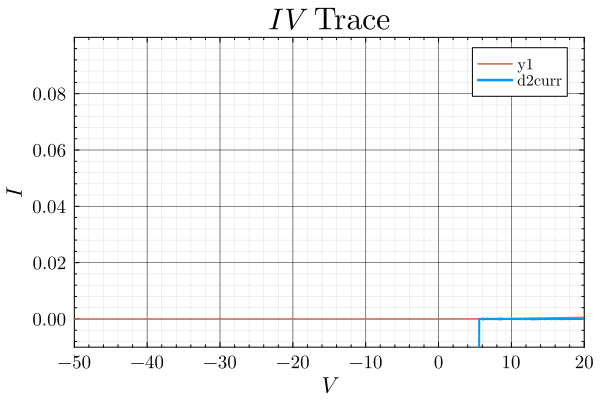

In [84]:
theme(:dao)

plot(volt, curr)
plot!(volt_offset, d2curr, 
    line=(2, :solid),
    label="d2curr",
    legend=:best,
    title=L"$IV$ Trace",
    xlabel=L"$V$",
    ylabel=L"$I$",
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    right_margin = 2 * Plots.mm,
    xlims=(-50, 20),
    ylims=(-.01, 0.1)
)

In [85]:
d2curr

730-element Vector{Any}:
  0.004451888
 -1.1642000000000943e-5
  2.4798000000001222e-5
 -1.818800000000058e-5
  8.01300000000029e-6
  3.628999999998918e-6
 -1.3241999999999247e-5
  8.677999999999811e-6
  1.030000000000822e-6
  3.4779999999994676e-6
 -1.8221000000000556e-5
  2.6898000000000026e-5
 -2.5863999999999575e-5
  ⋮
 -9.999999999998899e-5
 -1.3877787807814457e-17
  1.3877787807814457e-17
  0.00010000000000000286
 -0.00020000000000000573
  0.00020000000000000573
 -0.00010000000000001674
  1.3877787807814457e-17
  0.00010000000000000286
 -1.3877787807814457e-17
 -0.00019999999999999185
 -0.07949999999999999